In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
birth = pd.read_csv(r"./Datasets/daily-total-female-births.csv",index_col=0,parse_dates=True)

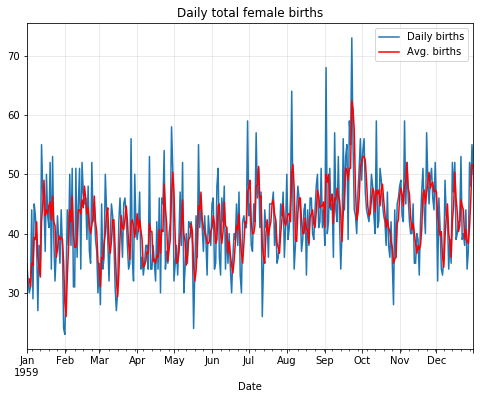

In [19]:
ax = plt.gca() 
birth.plot(figsize=(8,6),ax=ax).set(title="Daily total female births")
birth.rolling(3).mean().plot(ax=ax,color='r')
ax.legend(['Daily births','Avg. births'])
ax.grid(True,alpha=.3)

In [22]:
birth.rolling(3).mean().head()
# First mean of three values will be available on the date
# when we have completed three values

,Births
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,32.333333
1959-01-04,31.000000
1959-01-05,35.000000


# Rolling Mean i.e. running mean as feature

In [24]:
ts = pd.DataFrame()
ts['t'] = birth.Births

In [26]:
ts['mean'] = ts.t.rolling(3).mean()

In [29]:
ts.head() 
# we want to use the mean as a feature i.e. x 
# i.e. first mean of 32.333 on 1959-01-03 should be
# actually available to us on 1959-01-04 as we cannot 
# get the mean without observing the value on 1959-01-03

,t,mean
Date,,
1959-01-01,35,NaN
1959-01-02,32,NaN
1959-01-03,30,32.333333
1959-01-04,31,31.000000
1959-01-05,44,35.000000


In [30]:
# to aling them properly
# we can shift the mean to next days
ts['mean'] = ts['mean'].shift(1)

In [33]:
ts.head() # now we have correct feature as x

,t,mean
Date,,
1959-01-01,35,NaN
1959-01-02,32,NaN
1959-01-03,30,NaN
1959-01-04,31,32.333333
1959-01-05,44,31.000000


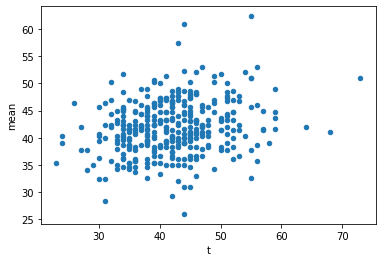

In [34]:
# we can interpret t as observed and mean as forecast
ts.plot.scatter(x='t',y='mean')

In [48]:
# rmse
from sklearn.metrics import mean_squared_error
ts = ts.dropna()
rmse = pd.np.sqrt(mean_squared_error(ts['t'],ts['mean']))

In [49]:
rmse

7.834479364464245

# Summary
- How moving average smoothing works and the expectations of time series data before
using it.
- How to use moving average smoothing for data preparation in Python.
- How to use moving average smoothing for feature engineering in Python.
- How to use moving average smoothing to make predictions in Python.

[Text(0.5, 1.0, 'Mean Births across day of week')]

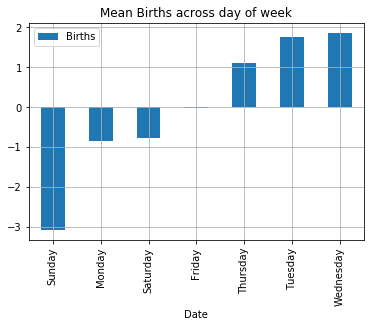

In [64]:
weekly_births = birth.groupby(birth.index.weekday_name).mean()
weekly_births = weekly_births - weekly_births.mean()
weekly_births.sort_values(by='Births').plot.bar(grid=True).set(title="Mean Births across day of week")
# why sunday has lowest birth rate?

In [65]:
birth['day'] = birth.index.weekday_name

In [69]:
birth = birth.iloc[:7*5]

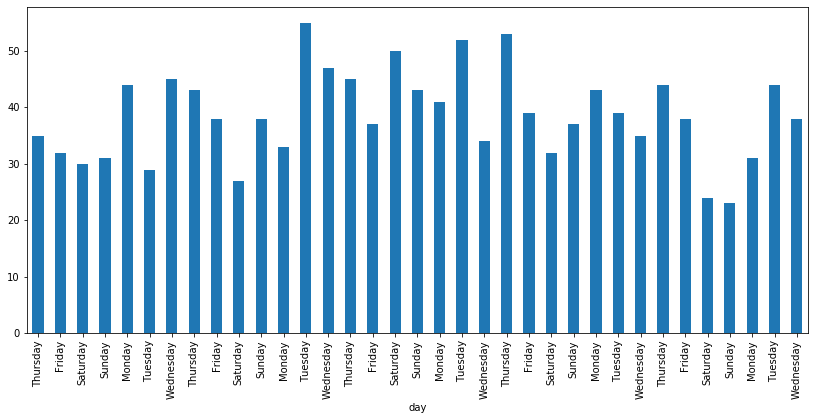

In [71]:
birth.set_index("day")['Births'].plot(kind='bar',figsize=(14,6))